# 1. Código

In [80]:
# importo librerias
import pandas as pd
import statsmodels.api as sm

# función para eliminar columnas de p-values 

def outmax(x, pv):
    mp = pv.idxmax()
    x = x.drop(mp, axis = 1)
    return x
# importo las bases de datos

df = pd.read_csv("diabetes390-1.csv")
col = df.columns
xi = df.iloc[:,1:15]
xi = xi.drop(['genero','glucosa'], axis=1)
xi = sm.add_constant(xi)
xi


,const,colesterol,hdl_chol,prop_col_hdl,edad,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad
0,1.0,193,49,3.9,19,61,119,22.5,118,70,32,38,0.84
1,1.0,146,41,3.6,19,60,135,26.4,108,58,33,40,0.83
2,1.0,217,54,4.0,20,67,187,29.3,110,72,40,45,0.89
3,1.0,226,70,3.2,20,64,114,19.6,122,64,31,39,0.79
4,1.0,164,67,2.4,20,70,141,20.2,122,86,32,39,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1.0,227,44,5.2,83,59,125,25.2,150,90,35,40,0.88
386,1.0,226,52,4.3,84,60,192,37.5,144,88,41,48,0.85
387,1.0,301,118,2.6,89,61,115,21.7,218,90,31,41,0.76
388,1.0,232,114,2.0,91,61,127,24.0,170,82,35,38,0.92


In [81]:
y = df.loc[:,'glucosa']
model = sm.OLS(y, xi)
results=model.fit()
r_squared = results.rsquared
p_value = results.pvalues
p_value

const            0.199031
colesterol       0.514555
hdl_chol         0.457439
prop_col_hdl     0.028065
edad             0.000011
altura           0.268090
peso             0.076312
IMC              0.148576
ps_sistolica     0.508197
ps_diastolica    0.355556
cintura          0.504109
caderas          0.510220
prop_cin_cad     0.506100
dtype: float64

In [82]:
# bucle while para eliminar p-values inválidos y realizar de nuevo la regresión

while (p_value > 0.05).any():
    
    xi = outmax(xi, p_value)
    model = sm.OLS(y, xi)
    results = model.fit()
    p_value = results.pvalues

In [83]:
print(p_value)

prop_col_hdl    6.028182e-05
edad            3.596076e-11
peso            1.875034e-06
dtype: float64


In [84]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                glucosa   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              640.9
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                   1.07e-149
Time:                        22:12:28   Log-Likelihood:                         -2072.3
No. Observations:                 390   AIC:                                      4151.
Df Residuals:                     387   BIC:                                      4162.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# 2. Ecuación General

Al realizar la regresión las veces necesarias, se llega al siguiente modelo de 3 variables :

$ Glucosa = 6.1137  * Propcolhdl + 0.9028 * edad +  0.2106  * Peso $

# 3. Comparación con MiniTab

Al usar MiniTab, se llega a lo siguiente: 

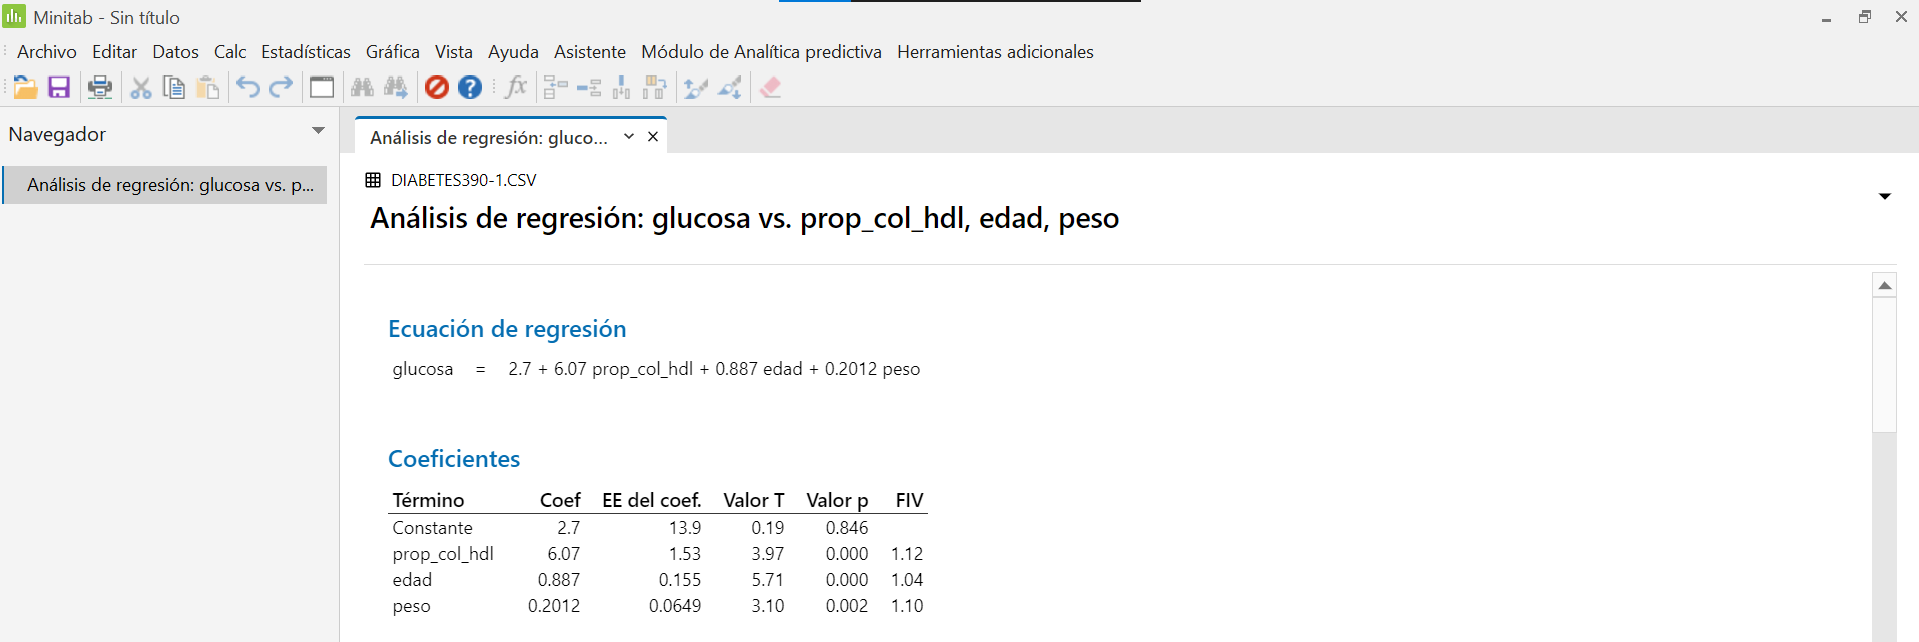

# 4. Comentarios Finales

Podemos observar que los resultados entre MiniTab y Python no cambian mucho, pues su diferencia no es muy significativa ,por lo que se puede considerar un algoritmo de optimizar variables dependientes significativas muy bueno.